In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D


from keras.layers import Flatten
from keras.layers import Dense

In [2]:
# Initialising the CNN
classifier = Sequential()

# CNN - 1
# Step 1 - Convolution Layer
classifier.add(Convolution2D(32, 3, 3, input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling Layer
classifier.add(MaxPooling2D(pool_size = (2, 2)))


# Adding a second convolutional layer ( CNN - 2)
classifier.add(Convolution2D(32, 3, 3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening Layer 
classifier.add(Flatten())

# Step 4 - Full connection  ( Neural Netwokr)
classifier.add(Dense(units = 128, activation = 'relu'))   ## 1 HIDDEN LAYER WITH 128 NEURONS 
classifier.add(Dense(units = 1, activation = 'sigmoid'))  ## OUTPUT LAYER WITH 1 NUERONS # sigmoid = probability

In [3]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [4]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 21, 21, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 1, 1, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 128)               4

In [5]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)  # max normilization
                                   

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r'C:\Users\admin\Downloads\dataset\training_set',
                                                 target_size = (64, 64),  # HEIGHT AND WIDTH
                                                 batch_size = 32, # take 32 group which pick image randomly without replacement
                                                 class_mode = 'binary') # binary because we have 2 type = cat / dogs

test_set = test_datagen.flow_from_directory(r'C:\Users\admin\Downloads\dataset\test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [6]:
8000/32  # each group will have 250 image unique

250.0

In [7]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [8]:
import warnings 
warnings.filterwarnings("ignore")

In [10]:
classifier.save('cat_dog_classifier.h5')

In [11]:
from  keras.models import load_model
from keras_preprocessing import image
import numpy as np
import cv2   #pip install opencv-python
import matplotlib.pyplot as plt 
%matplotlib inline

In [12]:
model=load_model("cat_dog_classifier.h5")

In [13]:
def model_output (path):
    raw_img = image.load_img(path,target_size=(64,64))  # data import 7 convert image into height= 64 , width = 64 
    raw_img = image.img_to_array(raw_img) # convert image to array 
    raw_img = np.expand_dims(raw_img, axis=0)
    raw_img = raw_img/255                     # data max normalization
    prediction= model.predict(raw_img)[0][0]  # 0,0  # we have 2 type of class cat=0 ,  dog = 1 
    accuracy = model.predict(raw_img)[0][0]  # probability
    #prediction = (model.predict(raw_img) > 0.5).astype("int32  # new tensorflow version
    plt.imshow(cv2.imread(path))
    print('Accuracy',
          accuracy)
    if prediction>0.5:
        print("its a dog")
    else:
        print("its a cat")

In [14]:
import os 
os.getcwd()

'C:\\Users\\admin\\Downloads'

1/1 [==============================] - 0s 143ms/step
Accuracy 0.25291196
its a cat


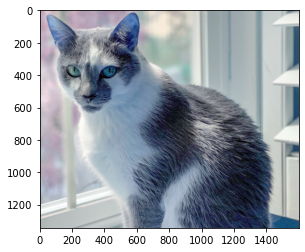

In [15]:
model_output("demo6.jpg")

1/1 [==============================] - 0s 118ms/step
Accuracy 0.8850612
its a dog


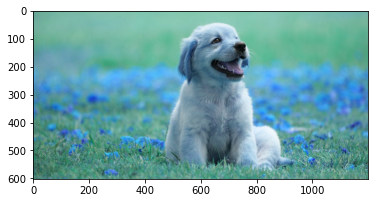

In [16]:
model_output("demo2.jpg")

1/1 [==============================] - 0s 94ms/step
Accuracy 0.14175129
its a cat


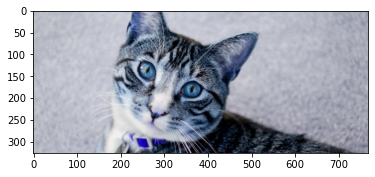

In [17]:
model_output("demo.jpg")

1/1 [==============================] - 0s 95ms/step
Accuracy 0.8455683
its a dog


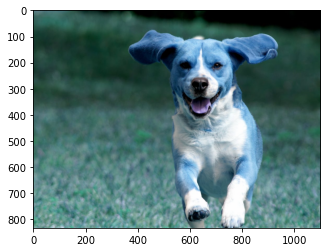

In [18]:
model_output("demo1.jpg")

1/1 [==============================] - 0s 340ms/step
Accuracy 0.32848573
its a cat


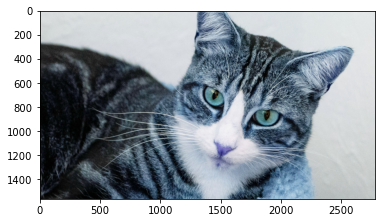

In [19]:
model_output("demo11.jpg")

## Finish